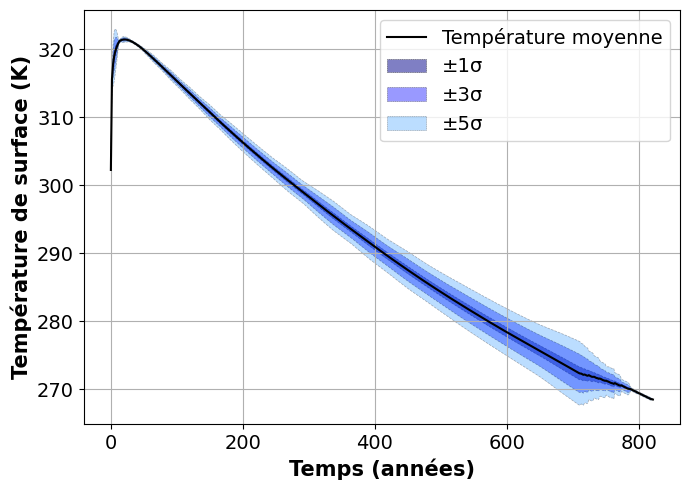

In [1]:
# --- PLOT TEMPERATURE WITH STANDARD DEVIATION ---
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# File path
path = "Couplage_1D_resultats\\"
file_pattern = path+r"Lib_Couplage_exok_bio_file_niter1_*_niter2_*.pkl"
file_list = glob.glob(file_pattern)

Teq_interp_list = []
t_min, t_max = np.inf, -np.inf
valid_data = []

# 1. Collect valid time limits
for file in file_list:
    try:
        with open(file, 'rb') as f:
            data = pickle.load(f)
            t = np.array(data['t_list'])
            Teq = np.array(data['Teq_list'])
            if len(t) < 2 or len(t) != len(Teq):
                print(f"⚠️ Ignored (unvalid data) : {file}")
                continue
            t_min = min(t_min, t[0])
            t_max = max(t_max, t[-1])
            valid_data.append((t, Teq))
    except Exception as e:
        print(f"Error when reading {file} : {e}")

# Check
if not valid_data:
    raise ValueError("No valid data. Please check input files")

# 2. Common time for interpolation
n_points = 500
t_common = np.linspace(t_min, t_max, n_points)

# 3. Interpolation
for t, Teq in valid_data:
    interp_func = interp1d(t, Teq, kind='linear', bounds_error=False, fill_value=np.nan)
    Teq_interp = interp_func(t_common)
    Teq_interp_list.append(Teq_interp)

# 4. Stack & means
Teq_interp_array = np.vstack(Teq_interp_list)
Teq_mean = np.nanmean(Teq_interp_array, axis=0)
Teq_std = np.nanstd(Teq_interp_array, axis=0)

# 5. Plot
plt.figure(figsize=(7, 5))
plt.plot(t_common/365.25, Teq_mean, label='Mean T', color='black')
plt.fill_between(t_common/365.25, Teq_mean - Teq_std, Teq_mean + Teq_std, color='darkblue', alpha=0.5, label='±1σ',
                edgecolor='black',linestyle='--',linewidth=0.5)
plt.fill_between(t_common/365.25, Teq_mean - 3 * Teq_std, Teq_mean + 3 * Teq_std, color='blue', alpha=0.4, label='±3σ',
                edgecolor='black',linestyle='--',linewidth=0.5)
plt.fill_between(t_common/365.25, Teq_mean - 5 * Teq_std, Teq_mean + 5 * Teq_std, color='dodgerblue', alpha=0.3, label='±5σ',
                edgecolor='black',linestyle='--',linewidth=0.5)
plt.xlabel("Time (years)",fontsize=15,weight='bold')
plt.ylabel("Surface temperature (K)",weight='bold',fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175


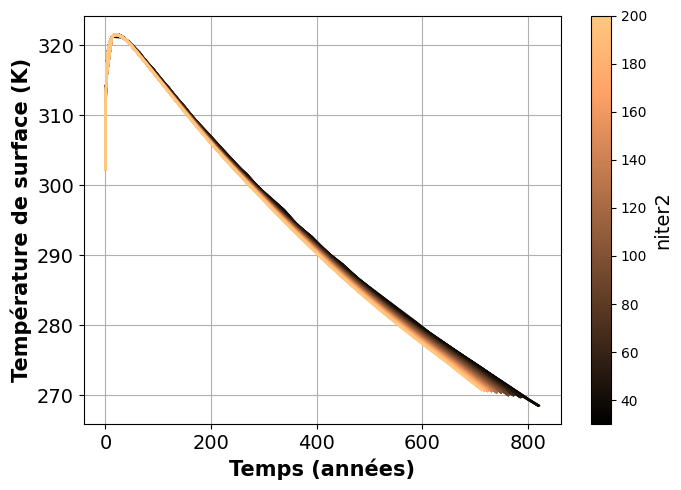

In [2]:
# --- PLOT TEMPERATURE FOR EACH NITER2 VALUE ---
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import re
import os

# Define colormap
cmap = plt.get_cmap('copper')

# Path to files
path = "Couplage_1D_resultats\\"
file_pattern = path+r"Lib_Couplage_exok_bio_file_niter1_*_niter2_*.pkl"
file_list = glob.glob(file_pattern)

# 1. Extract (file, niter2 value)
file_gel_list = []
for file in file_list:
    match = re.search(r"niter2_([-\d.eE]+)(?=\.pkl)", file)
    if match:
        gel_value = float(match.group(1))
        file_gel_list.append((file, gel_value))

# 2. Sort by niter2
file_gel_list.sort(key=lambda x: x[1])
gel_values_sorted = [g for _, g in file_gel_list]

# 3. Normalisation and colors
norm = plt.Normalize(min(gel_values_sorted), max(gel_values_sorted))
colors = [cmap(norm(gel)) for gel in gel_values_sorted]

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 5))
for i, (file, gel_value) in enumerate(file_gel_list):
    with open(file, 'rb') as f:
        data = pickle.load(f)
        t = np.array(data['t_list'])
        Teq = np.array(data['Teq_list'])
        ax.plot(t/365.25, Teq, color=colors[i])

ax.set_xlabel("Time (years)", fontsize=15, weight='bold')
ax.set_ylabel("Surface temperature (K)", fontsize=15, weight='bold')
ax.tick_params(labelsize=14)
ax.grid(True)

# 5. Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Obligatoire
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("niter2", fontsize=14)

plt.tight_layout()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175


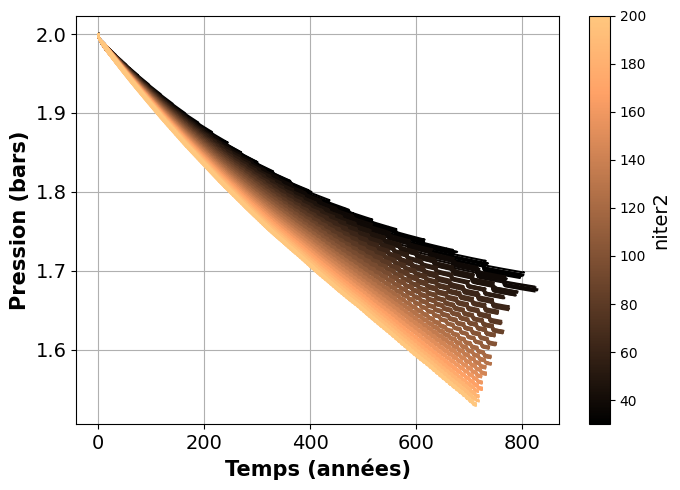

In [3]:
# --- PLOT PRESSURE FOR EACH NITER2 VALUE ---
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define colormap
cmap = plt.get_cmap('copper')

# Path to files
path = "Couplage_1D_resultats\\"
file_pattern = path+r"Lib_Couplage_exok_bio_file_niter1_*_niter2_*.pkl"
file_list = glob.glob(file_pattern)

# 1. Extract (file, niter2 value)
file_gel_list = []
for file in file_list:
    match = re.search(r"niter2_([-\d.eE]+)(?=\.pkl)", file)
    if match:
        gel_value = float(match.group(1))
        file_gel_list.append((file, gel_value))

# 2. Sort by niter2
file_gel_list.sort(key=lambda x: x[1])
gel_values_sorted = [g for _, g in file_gel_list]

# 3. Normalisation and colors
norm = plt.Normalize(min(gel_values_sorted), max(gel_values_sorted))
colors = [cmap(norm(gel)) for gel in gel_values_sorted]

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 5))

i=0
for i, (file, gel_value) in enumerate(file_gel_list):
    big_timep_list = []
    big_pressure_list = []
    with open(file, 'rb') as f:
        data = pickle.load(f)
        tp = (data['timesp_all'])
        P = (data['press_all'])
        t_list = (data['t_list'])
    for s in range(len(t_list)-1):
        ttim2 = np.array(tp[s])+t_list[s]
        big_timep_list = np.concatenate([big_timep_list,ttim2])
        big_pressure_list = np.concatenate([big_pressure_list,P[s]])
        
    ax.plot(big_timep_list/365.25,big_pressure_list/1e5,color=colors[i])
# plt.xlim(0,0.001)
# plt.ylim(1.99995e5,2e5)

ax.set_xlabel("Time (years)",fontsize=15,weight='bold')
ax.set_ylabel("Pressure (bars)",weight='bold',fontsize=15)
ax.tick_params(axis='both', labelsize=14)
ax.grid(True)

# 5. Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Obligatoire
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("niter2", fontsize=14)
plt.tight_layout()
plt.show()

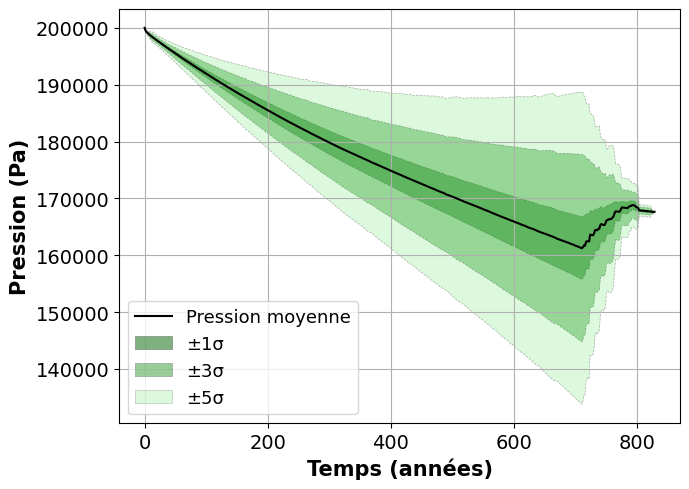

In [4]:
# --- PLOT PRESSURE WITH STANDARD DEVIATION ---
import numpy as np
import matplotlib.pyplot as plt
import pickle, glob, os
from scipy.interpolate import interp1d

# Path to files
path = "Couplage_1D_resultats\\"
file_pattern = path+r"Lib_Couplage_exok_bio_file_niter1_*_niter2_*.pkl"
file_list = glob.glob(file_pattern)

pressure_interp_list = []
t_min, t_max = np.inf, -np.inf
valid_data = []

# 1. Extraction and concatenation of pressure
for file in file_list:
    try:
        with open(file, 'rb') as f:
            data = pickle.load(f)
            t_list = data["t_list"]
            press_all = data["press_all"]
            timesp_all = data["timesp_all"]

            big_timep_list = []
            big_pressure_list = []

            for i in range(len(t_list) - 1):
                t_segment = np.array(timesp_all[i]) + t_list[i]
                p_segment = np.array(press_all[i])
                big_timep_list = np.concatenate([big_timep_list, t_segment])
                big_pressure_list = np.concatenate([big_pressure_list, p_segment])

            if len(big_timep_list) < 2:
                continue

            t_min = min(t_min, big_timep_list[0])
            t_max = max(t_max, big_timep_list[-1])
            valid_data.append((big_timep_list, big_pressure_list))

    except Exception as e:
        print(f"Error when reading {file} : {e}")

if not valid_data:
    raise ValueError("No valid pressure data found.")

# 2. Interpolation on a common time base
n_points = 500
t_common = np.linspace(t_min, t_max, n_points)

for t, p in valid_data:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    pressure_interp = interp_func(t_common)
    pressure_interp_list.append(pressure_interp)

# 3. Statistics
pressure_array = np.vstack(pressure_interp_list)
pressure_mean = np.nanmean(pressure_array, axis=0)
pressure_std = np.nanstd(pressure_array, axis=0)

# 4. Plot
plt.figure(figsize=(7, 5))
plt.plot(t_common / 365.25, pressure_mean, label='Mean ressure', color='black')
plt.fill_between(t_common / 365.25, pressure_mean - pressure_std, pressure_mean + pressure_std,
                 color='darkgreen', alpha=0.5, label='±1σ',
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, pressure_mean - 3 * pressure_std, pressure_mean + 3 * pressure_std,
                 color='green', alpha=0.4, label='±3σ',
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, pressure_mean - 5 * pressure_std, pressure_mean + 5 * pressure_std,
                 color='lightgreen', alpha=0.3, label='±5σ',
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.xlabel("Time (years)",fontsize=15,weight='bold')
plt.ylabel("Pressure (Pa)",weight='bold',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()


In [5]:
# --- READING CONCENTRATIONS LISTS ---

import numpy as np
import matplotlib.pyplot as plt
import pickle, glob, os
from scipy.interpolate import interp1d

# Path to files
path = "Couplage_1D_resultats\\"
file_pattern = path+r"Lib_Couplage_exok_bio_file_niter1_*_niter2_*.pkl"
file_list = glob.glob(file_pattern)

H_interp_list = []
C_interp_list = []
G_interp_list = []
N_interp_list = []

t_min, t_max = np.inf, -np.inf
valid_dataH = []
valid_dataC = []
valid_dataG = []
valid_dataN = []

# 1. Extraction and concatenation
for file in file_list:
    try:
        with open(file, 'rb') as f:
            data = pickle.load(f)
            t_list = data["t_list"]
            medium = data["medium_all"]
            times = data["times_all"]

            big_time_list = []
            big_ch4_wat_list = []
            big_n2_wat_list = []
            big_h2_wat_list = []
            big_co2_wat_list = []

            for i in range(len(t_list) - 1):
                ttim = np.array(times[i])+t_list[i]
                big_time_list = np.concatenate([big_time_list,ttim])
                big_ch4_wat_list = np.concatenate([big_ch4_wat_list,medium[i][2]])
                big_n2_wat_list = np.concatenate([big_n2_wat_list,medium[i][3]])
                big_h2_wat_list = np.concatenate([big_h2_wat_list,medium[i][0]])
                big_co2_wat_list = np.concatenate([big_co2_wat_list,medium[i][1]])

            t_min = min(t_min, big_time_list[0])
            t_max = max(t_max, big_time_list[-1])
            valid_dataH.append((big_time_list,big_h2_wat_list ))
            valid_dataC.append((big_time_list,big_co2_wat_list ))
            valid_dataG.append((big_time_list,big_ch4_wat_list ))
            valid_dataN.append((big_time_list,big_n2_wat_list ))

    except Exception as e:
        print(f"❌ Error when reading {file} : {e}")

if not valid_dataH:
    raise ValueError("No valid pressure data found. H ")
if not valid_dataC:
    raise ValueError("No valid pressure data found. C")
if not valid_dataG:
    raise ValueError("No valid pressure data found. G")
if not valid_dataN:
    raise ValueError("No valid pressure data found. N")

# 2. Interpolation on a common time base
n_points = 500
t_common = np.linspace(t_min, t_max, n_points)

for t, p in valid_dataH:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    H_interp = interp_func(t_common)
    H_interp_list.append(H_interp)

for t, p in valid_dataC:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    C_interp = interp_func(t_common)
    C_interp_list.append(C_interp)

for t, p in valid_dataG:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    G_interp = interp_func(t_common)
    G_interp_list.append(G_interp)

for t, p in valid_dataN:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    N_interp = interp_func(t_common)
    N_interp_list.append(N_interp)

# 3. Statistics
H_array = np.vstack(H_interp_list)
H_mean = np.nanmean(H_array, axis=0)
H_std = np.nanstd(H_array, axis=0)

C_array = np.vstack(C_interp_list)
C_mean = np.nanmean(C_array, axis=0)
C_std = np.nanstd(C_array, axis=0)

G_array = np.vstack(G_interp_list)
G_mean = np.nanmean(G_array, axis=0)
G_std = np.nanstd(G_array, axis=0)

N_array = np.vstack(N_interp_list)
N_mean = np.nanmean(N_array, axis=0)
N_std = np.nanstd(N_array, axis=0)



findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


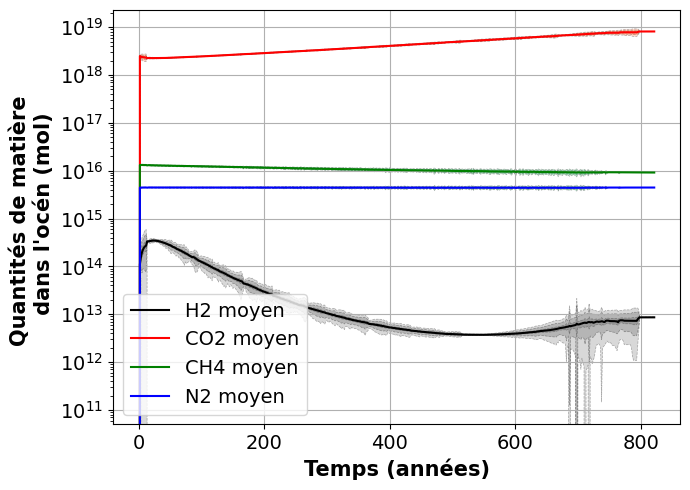

In [6]:
# --- PLOT CONCENTRATIONS WITH STANDARD DEVIATION ---
# 4. Plot
plt.figure(figsize=(7, 5))
plt.plot(t_common / 365.25, H_mean, label='H2 mean', color='black')
plt.fill_between(t_common / 365.25, H_mean - H_std, H_mean + H_std,
                 color='grey', alpha=0.5, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, H_mean - 3 * H_std, H_mean + 3 * H_std,
                 color='grey', alpha=0.4, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, H_mean - 5 * H_std, H_mean + 5 * H_std,
                 color='grey', alpha=0.3, 
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.plot(t_common / 365.25, C_mean, label='CO2 mean', color='red')
plt.fill_between(t_common / 365.25, C_mean - C_std, C_mean + C_std,
                 color='coral', alpha=0.5, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, C_mean - 3 * C_std, C_mean + 3 * C_std,
                 color='coral', alpha=0.4, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, C_mean - 5 * C_std, C_mean + 5 * C_std,
                 color='coral', alpha=0.3, 
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.plot(t_common / 365.25, G_mean, label='CH4 mean', color='green')
plt.fill_between(t_common / 365.25, G_mean - G_std, G_mean + G_std,
                 color='mediumseagreen', alpha=0.5, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, G_mean - 3 * G_std, G_mean + 3 * G_std,
                 color='mediumseagreen', alpha=0.4, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, G_mean - 5 * G_std, G_mean + 5 * G_std,
                 color='mediumseagreen', alpha=0.3, 
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.plot(t_common / 365.25, N_mean, label='N2 mean', color='blue')
plt.fill_between(t_common / 365.25, N_mean - N_std, N_mean + N_std,
                 color='skyblue', alpha=0.5, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, N_mean - 3 * N_std, N_mean + 3 * N_std,
                 color='mediumseagreen', alpha=0.4, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, N_mean - 5 * N_std, N_mean + 5 * N_std,
                 color='mediumseagreen', alpha=0.3, 
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.xlabel("Time (years)", fontsize=15, weight='bold')
plt.ylabel(f"Matter quantities \n in the ocean (mol)", fontsize=15,weight='bold')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [7]:
# --- READING ATMOSPHERIC COMPOSITION LISTS ---
import numpy as np
import matplotlib.pyplot as plt
import pickle, glob, os
from scipy.interpolate import interp1d

# Path to files
path = "Couplage_1D_resultats\\"
file_pattern = path+r"Lib_Couplage_exok_bio_file_niter1_*_niter2_*.pkl"
file_list = glob.glob(file_pattern)

H_interp_list = []
C_interp_list = []
G_interp_list = []
N_interp_list = []

t_min, t_max = np.inf, -np.inf
valid_dataH = []
valid_dataC = []
valid_dataG = []
valid_dataN = []

# 1. Extraction and concatenation 
for file in file_list:
    try:
        with open(file, 'rb') as f:
            data = pickle.load(f)
            t_list = data["t_list"]
            atmo = data["atmo_all"]
            times = data["times_all"]

            big_time_list = []
            big_ch4_atm_list = []
            big_n2_atm_list = []
            big_h2_atm_list = []
            big_co2_atm_list = []

            for i in range(len(t_list) - 1):
                ttim = np.array(times[i])+t_list[i]
                big_time_list = np.concatenate([big_time_list,ttim])
                big_ch4_atm_list = np.concatenate([big_ch4_atm_list,atmo[i][2]])
                big_n2_atm_list = np.concatenate([big_n2_atm_list,atmo[i][3]])
                big_h2_atm_list = np.concatenate([big_h2_atm_list,atmo[i][0]])
                big_co2_atm_list = np.concatenate([big_co2_atm_list,atmo[i][1]])

            t_min = min(t_min, big_time_list[0])
            t_max = max(t_max, big_time_list[-1])
            valid_dataH.append((big_time_list,big_h2_atm_list ))
            valid_dataC.append((big_time_list,big_co2_atm_list ))
            valid_dataG.append((big_time_list,big_ch4_atm_list ))
            valid_dataN.append((big_time_list,big_n2_atm_list ))

    except Exception as e:
        print(f"❌ Error when reading {file} : {e}")

if not valid_dataH:
    raise ValueError("No valid pressure data found. H ")
if not valid_dataC:
    raise ValueError("No valid pressure data found. C")
if not valid_dataG:
    raise ValueError("No valid pressure data found. G")
if not valid_dataN:
    raise ValueError("No valid pressure data found. N")

# 2. Interpolation on a common time base
n_points = 500
t_common = np.linspace(t_min, t_max, n_points)

for t, p in valid_dataH:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    H_interp = interp_func(t_common)
    H_interp_list.append(H_interp)

for t, p in valid_dataC:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    C_interp = interp_func(t_common)
    C_interp_list.append(C_interp)

for t, p in valid_dataG:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    G_interp = interp_func(t_common)
    G_interp_list.append(G_interp)

for t, p in valid_dataN:
    interp_func = interp1d(t, p, kind='linear', bounds_error=False, fill_value=np.nan)
    N_interp = interp_func(t_common)
    N_interp_list.append(N_interp)

# 3. Statistics
H_array = np.vstack(H_interp_list)
H_mean = np.nanmean(H_array, axis=0)
H_std = np.nanstd(H_array, axis=0)

C_array = np.vstack(C_interp_list)
C_mean = np.nanmean(C_array, axis=0)
C_std = np.nanstd(C_array, axis=0)

G_array = np.vstack(G_interp_list)
G_mean = np.nanmean(G_array, axis=0)
G_std = np.nanstd(G_array, axis=0)

N_array = np.vstack(N_interp_list)
N_mean = np.nanmean(N_array, axis=0)
N_std = np.nanstd(N_array, axis=0)

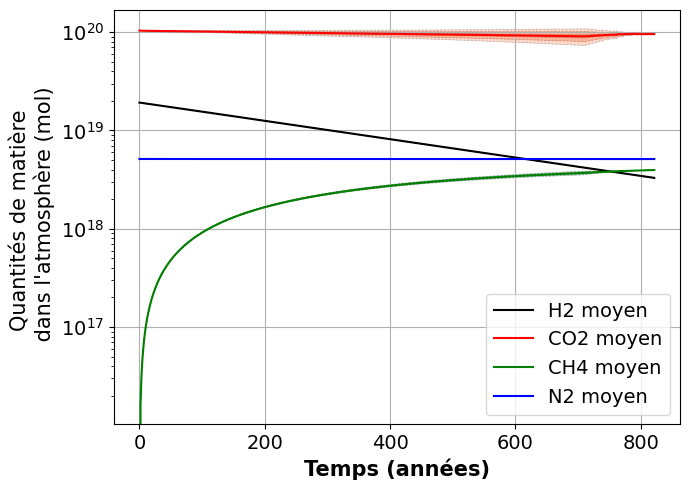

In [8]:
# --- PLOT ATMOSPHERIC COMPOSITION WITH STANDARD DEVIATION ---
# 4. Plot
plt.figure(figsize=(7, 5))
plt.plot(t_common / 365.25, H_mean, label='H2 mean', color='black')
plt.fill_between(t_common / 365.25, H_mean - H_std, H_mean + H_std,
                 color='grey', alpha=0.5, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, H_mean - 3 * H_std, H_mean + 3 * H_std,
                 color='grey', alpha=0.4, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, H_mean - 5 * H_std, H_mean + 5 * H_std,
                 color='grey', alpha=0.3, 
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.plot(t_common / 365.25, C_mean, label='CO2 mean', color='red')
plt.fill_between(t_common / 365.25, C_mean - C_std, C_mean + C_std,
                 color='coral', alpha=0.5, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, C_mean - 3 * C_std, C_mean + 3 * C_std,
                 color='coral', alpha=0.4, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, C_mean - 5 * C_std, C_mean + 5 * C_std,
                 color='coral', alpha=0.3, 
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.plot(t_common / 365.25, G_mean, label='CH4 mean', color='green')
plt.fill_between(t_common / 365.25, G_mean - G_std, G_mean + G_std,
                 color='mediumseagreen', alpha=0.5, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, G_mean - 3 * G_std, G_mean + 3 * G_std,
                 color='mediumseagreen', alpha=0.4, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, G_mean - 5 * G_std, G_mean + 5 * G_std,
                 color='mediumseagreen', alpha=0.3, 
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.plot(t_common / 365.25, N_mean, label='N2 mean', color='blue')
plt.fill_between(t_common / 365.25, N_mean - N_std, N_mean + N_std,
                 color='skyblue', alpha=0.5, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, N_mean - 3 * N_std, N_mean + 3 * N_std,
                 color='mediumseagreen', alpha=0.4, 
                 edgecolor='black', linestyle='--', linewidth=0.5)
plt.fill_between(t_common / 365.25, N_mean - 5 * N_std, N_mean + 5 * N_std,
                 color='mediumseagreen', alpha=0.3, 
                 edgecolor='black', linestyle='--', linewidth=0.5)

plt.xlabel("Time (years)", fontsize=15, weight='bold')
plt.ylabel(f"Mole quantities \n in the atmosphere (mol)", fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175


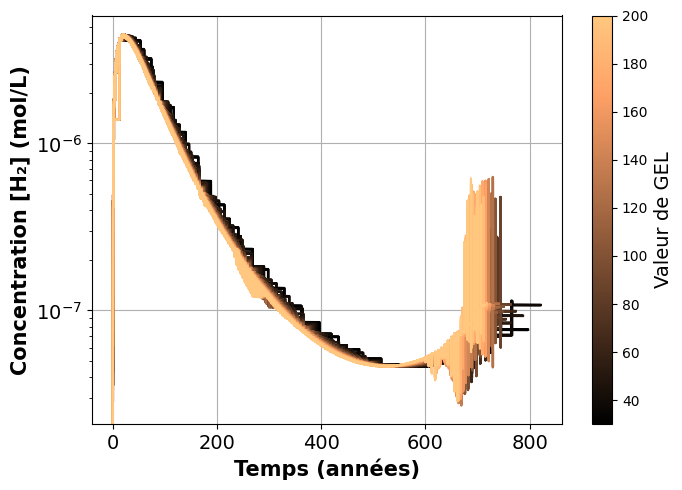

In [10]:
# --- PLOT H2 CONCENTRATION FOR EACH NITER2 VALUE ---
import numpy as np
import matplotlib.pyplot as plt
import pickle, glob, os, re
from Constants import *

# 1. Loading files
path = "Couplage_1D_resultats\\"
file_pattern = path+r"Lib_Couplage_exok_bio_file_niter1_*_niter2_*.pkl"
file_list_raw = glob.glob(file_pattern)

file_gel_list = []
for file in file_list_raw:
    match = re.search(r"niter2_([-\d.eE]+)(?=\.pkl)", file)
    if match:
        gel_value = float(match.group(1))
        file_gel_list.append((file, gel_value))

# Sort by niter2
file_gel_list.sort(key=lambda x: x[1])
gel_values_sorted = [g for _, g in file_gel_list]

# 2. Colormap
cmap = plt.get_cmap("copper")
norm = plt.Normalize(min(gel_values_sorted), max(gel_values_sorted))
colors = [cmap(norm(g)) for g in gel_values_sorted]

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 5))

for i, (file, gel_value) in enumerate(file_gel_list):
    try:
        with open(file, 'rb') as f:
            data = pickle.load(f)
            t_list = data["t_list"]
            medium = data["medium_all"]
            times = data["times_all"]

            big_time_list = []
            big_h2_list = []

            for j in range(len(t_list) - 1):
                ttim = np.array(times[j]) + t_list[j]
                big_time_list = np.concatenate([big_time_list, ttim])
                big_h2_list = np.concatenate([big_h2_list, medium[j][0]])  # H₂ = index 0

            ax.plot(big_time_list/365.25, big_h2_list/(550*Mars_surface*1e3), color=colors[i])

    except Exception as e:
        print(f"❌ Error in {file} : {e}")

ax.set_yscale('log')
ax.set_xlabel("Time (years)", fontsize=15, weight='bold')
ax.set_ylabel("Concentration [H₂] (mol/L)", fontsize=15, weight='bold')
ax.tick_params(labelsize=14)
ax.grid(True)

# === 5. Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Obligatoire
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("niter2", fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# --- CELL 10 ---
